# Analysis of French first names between 1900 and 2015

USING INSEE FILES AVAILABLE AT: https://www.insee.fr/fr/statistiques/2540004#consulter

## Content:

0. Import and explore the dataset
1. Most common names in 2015 and overall between 1900 and 2015
2. Evolution of some specific names throughout the years
3. Evolution of the number of names
4. Evolution of the length of names

## 0. Import and explore the dataset

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
df = pd.read_csv('nat2015.txt', sep = '\t', encoding = 'latin1')
print(df.head())

# Alternatively, can use Excel to convert the txt file into csv format 
# use the tab delimiter and 1252: Western European (Windows) (to properly display the French characters (é, ï, etc.)).

   sexe preusuel annais  nombre
0     1        A   1980     3.0
1     1        A   1998     3.0
2     1        A   XXXX    21.0
3     1    AADEL   1976     5.0
4     1    AADEL   1978     3.0


### Presentation of the features

The file contains four features:
- 'sexe': 1 for male, 2 for female
- 'preusuel': first name
- 'annais': year of birth, between 1900 and 2015
- 'nombre': number of people that year with that first name

INSEE used the following criteria to include a name or not:
1. Between 1900 and 1945, the name has been given at least 20 times to females and/or at least 20 times to males.
2. Between 1946 and 2015, the name has been given at least 20 times to females and/or at least 20 times to males.
3. For a given year, the name has been given at least 3 times to females or males.

Names that do not comply with conditions 1 and 2 are grouped by sex and year of birth under one entry with the value 'PRENOMS_RARES' (rare names) in the 'preusuel' column.

Names that comply with condition 2 but not condition 3 are grouped by sex and name under one entry with the value 'XXXX' in the 'annais' column.

### Rename columns

In [3]:
df.columns = ['sex', 'name', 'year', 'number']
print(df.head())

   sex   name  year  number
0    1      A  1980     3.0
1    1      A  1998     3.0
2    1      A  XXXX    21.0
3    1  AADEL  1976     5.0
4    1  AADEL  1978     3.0


### Example with the first name 'A'

In [4]:
dfA = df[(df.name) == 'A']
print(dfA)

   sex name  year  number
0    1    A  1980     3.0
1    1    A  1998     3.0
2    1    A  XXXX    21.0


- The first name 'A' was given 3 times to males in 1980
- The first name 'A' was given 3 times to males in 1998
- The first name 'A' was given 21 times between 1946 and 2015 but never more than 3 times for a given year except in 1980 and 1998

### General characteristics of the dataset

There are 589,411 entries (rows) in the dataset.

The gender ('sex') and number of people ('number') are considered integers.

The names ('name') and year ('year') are considered objects (strings). Years are considered strings because they include 'XXXX' values.

In [5]:
df.info(memory_usage="deep")

# Alternative way to get info:
# print(len(df.index))
# print(df.sex.dtype)
# print(df.name.dtype)
# print(df.year.dtype)
# print(df.number.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null int64
name      589408 non-null object
year      589411 non-null object
number    589411 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.9 MB


#### Convert 'sex' column from integers (1 and 2) to Boolean (False for male and True for female)

In [6]:
d = {1: False, 2: True}
df.sex = df.sex.apply(lambda x: d[x])

print(df.head())
print(df.sex.dtype)

     sex   name  year  number
0  False      A  1980     3.0
1  False      A  1998     3.0
2  False      A  XXXX    21.0
3  False  AADEL  1976     5.0
4  False  AADEL  1978     3.0
bool


#### Convert 'year' column from objects (strings) to float

In [7]:
# Method 1 - Replace the 'XXXX' values in the 'year' column with 0, then convert to integer 
# Note 1: When replacing 'XXXX' by 0 (instead of NaN), need to exclude 0 from the x-axis in the graphs. 
# Note 2: Without using pd.to_numeric, get int32 instead of int16 (which takes more memory).
# df.year = df.year.replace('XXXX', 0)
# df.year = df.year.astype('int')
# df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')

# Method 2 - Change the type of 'year' to numeric (errors = 'coerce' sets invalid entries as NaN)
# Note: Get Float64 not integer because of NaN 
# 'The lack of NaN rep in integer columns is a pandas "gotcha".'
# http://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int
df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'float')

print(df.head())
print(df.year.dtype)

     sex   name    year  number
0  False      A  1980.0     3.0
1  False      A  1998.0     3.0
2  False      A     NaN    21.0
3  False  AADEL  1976.0     5.0
4  False  AADEL  1978.0     3.0
float32


#### Convert 'number' column from float64 to in32

In [8]:
print('Maximum value in the "number" column: ' + str(df.number.max()))
print('Output range of int 8: ' + str(np.iinfo("int8").max))
print('Output range of int 16: ' + str(np.iinfo("int16").max))
print('Output range of int 32: ' + str(np.iinfo("int32").max))

df.number = pd.to_numeric(df.number, errors = 'coerce', downcast = 'integer')

Maximum value in the "number" column: 53897.0
Output range of int 8: 127
Output range of int 16: 32767
Output range of int 32: 2147483647


In [9]:
# The memory usage went from 80 MB to 42 MB
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589411 entries, 0 to 589410
Data columns (total 4 columns):
sex       589411 non-null bool
name      589408 non-null object
year      557017 non-null float32
number    589411 non-null int32
dtypes: bool(1), float32(1), int32(1), object(1)
memory usage: 41.7 MB


### Create 3 separate dataframes

- df: Dataframe with 'regular' names
- df_rare: Dataframe with 'rare' names (_PRENOMS_RARES), that is less than 20 people between 1900-1945 and 1946-2015
- df_xxxx: Dataframe with 'unknown' years (year == 'XXXX'), that is less than 3 people in a given year

In [10]:
# Create dataframe with 'unknown' years only
df_xxxx = df[df.year.isnull()]
print(df_xxxx.head())
print('There are ' + str(len(df_xxxx.index)) + ' names with less than 3 people in some years')

      sex    name  year  number
2   False       A   NaN      21
10  False   AADEL   NaN      25
33  False   AADIL   NaN      31
36  False  AAKASH   NaN      18
88  False   AARON   NaN      41
There are 32394 names with less than 3 people in some years


In [11]:
# Delete missing values (unknown years) from the main dataframe
df = df.dropna()
print(df.head())
print(len(df.index))

     sex   name    year  number
0  False      A  1980.0       3
1  False      A  1998.0       3
3  False  AADEL  1976.0       5
4  False  AADEL  1978.0       3
5  False  AADEL  1980.0       3
557015


In [12]:
# Convert 'years' column in the main dataframe to integer
df.year = pd.to_numeric(df.year, errors = 'coerce', downcast = 'integer')
print(df.head())

     sex   name  year  number
0  False      A  1980       3
1  False      A  1998       3
3  False  AADEL  1976       5
4  False  AADEL  1978       3
5  False  AADEL  1980       3


In [13]:
# Create dataframe with 'rare' names only
df_rare = df[((df.name) == '_PRENOMS_RARES')]

print(df_rare.head())

# There are 232 entries: 116 years (between 1900 and 2015) * 2 (male or female)
print(len(df_rare.index))

          sex            name  year  number
267562  False  _PRENOMS_RARES  1900    1254
267563  False  _PRENOMS_RARES  1901    1341
267564  False  _PRENOMS_RARES  1902    1329
267565  False  _PRENOMS_RARES  1903    1286
267566  False  _PRENOMS_RARES  1904    1427
232


In [14]:
# Delete 'rare' names from the main dataframe
df = df[(df.name != '_PRENOMS_RARES')]
print(len(df.index))

556783


## 1. Explore the most common names

### Most common names in 2015

In [15]:
# Create a dataframe with only the 2015 names
df2015 = df[(df.year) == 2015]

print('There were ' + str(int(sum(df2015.number))) + ' people born in 2015 in France.')

print('There were ' + str(int(df2015.name.nunique())) + ' different names given in 2015 in France.')

print('There were ' + str(int(len(df2015.index) - df2015.name.nunique())) + ' names given to both males and females in 2015 in France.')

There were 722584 people born in 2015 in France.
There were 12354 different names given in 2015 in France.
There were 375 names given to both males and females in 2015 in France.


In [16]:
# Create a dataframe with only the 2015 male names
df2015M = df[((df.year) == 2015) & ((df.sex) == False)]

# Sort the dataframe and show the most common 1male names
df2015M = df2015M.sort_values(by='number', ascending=False)
print(df2015M.head(10))

print('There were ' + str(len(df2015M.index)) + ' different male names given in 2015 in France.')

# Note: Creating df2015M as df2015M = df2015[(df.sex) == False] created the following User Warning:
# 'Boolean Series key will be reindexed to match DataFrame index.'

          sex     name  year  number
86800   False  GABRIEL  2015    5640
136284  False    JULES  2015    5147
156532  False    LUCAS  2015    5011
154454  False    LOUIS  2015    4748
6418    False     ADAM  2015    4526
107522  False     HUGO  2015    4349
159457  False      LÉO  2015    4303
208769  False  RAPHAËL  2015    4196
74146   False    ETHAN  2015    4135
186813  False   NATHAN  2015    3871
There were 5947 different male names given in 2015 in France.


In [17]:
# Create a dataframe with only the 2015 female names
df2015F = df[((df.year) == 2015) & ((df.sex) == 1)]

# Sort the dataframe and show the most common 10 female names
df2015F = df2015F.sort_values(by='number', ascending=False)
print(df2015F.head(10))

print('There were ' + str(len(df2015F.index)) + ' different female names given in 2015 in France.')

         sex     name  year  number
442241  True   LOUISE  2015    4540
354188  True     EMMA  2015    4399
400974  True     JADE  2015    4292
323634  True    CHLOÉ  2015    3598
458372  True    MANON  2015    3530
276692  True    ALICE  2015    3336
435420  True     LINA  2015    3191
448550  True      LÉA  2015    3100
439018  True     LOLA  2015    3061
313888  True  CAMILLE  2015    3020
There were 6782 different female names given in 2015 in France.


### Most common given names overall between 1900 and 2015

In [18]:
# Calculate number of people per name
total_name = {}
for i in range(len(df.index)):
    if df.iloc[i]['name'] in total_name:
        total_name[df.iloc[i]['name']] += df.iloc[i]['number']
    else:
        total_name[df.iloc[i]['name']] = df.iloc[i]['number']
        
# Create a dataframe from the dictionnary
total = pd.DataFrame.from_dict(total_name, orient='index')
total = total.rename(columns = {0:'number'})

# Sort rows by increasing years
total = total.sort_values(by='number', ascending = 0)

print(total.head(10))

print('There is a bias toward "old" names because there were more people with a given name in the past (less diversity in names).')
print('See Section 3: Evolution of the number of names')

           number
MARIE     2261897
JEAN      1920336
PIERRE     890202
MICHEL     820221
ANDRÉ      712386
JEANNE     550423
PHILIPPE   538393
RENÉ       516882
ALAIN      506763
LOUIS      504555
There is a bias toward "old" names because there were more people with a given name in the past (less diversity in names).
See Section 3: Evolution of the number of names


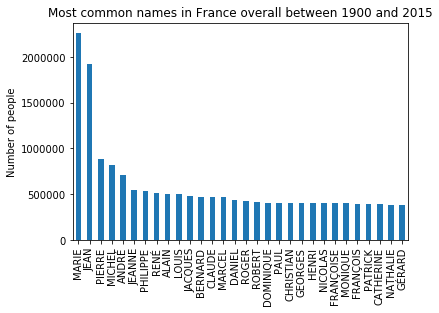

In [19]:
total.head(30).plot(kind='bar', title = 'Most common names in France overall between 1900 and 2015', legend = None)
plt.ylabel("Number of people")
plt.show()

#### Let's look at the 3 most common names: Marie, Jean et Pierre

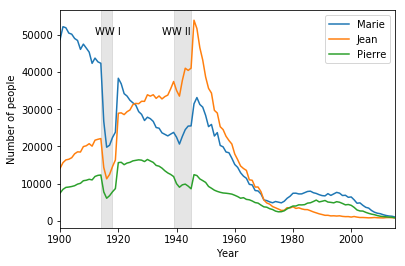

We can see a huge dip during WWI and a peak during the baby boom after WWII


In [20]:
dfMARIE = df[((df.name) == 'MARIE') & ((df.sex) == 1)]
dfJEAN = df[((df.name) == 'JEAN') & ((df.sex) == 0)]
dfPIERRE = df[((df.name) == 'PIERRE') & ((df.sex) == 0)]

plt.plot(dfMARIE.year, dfMARIE.number, label = 'Marie')
plt.plot(dfJEAN.year, dfJEAN.number, label = 'Jean')
plt.plot(dfPIERRE.year, dfPIERRE.number, label = 'Pierre')
plt.xlim([1900,2015])
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1914, 1918, alpha=0.2, color='grey')
plt.annotate('WW I', xy=(1912, 50000))
plt.axvspan(1939, 1945, alpha=0.2, color='grey')
plt.annotate('WW II', xy=(1935, 50000))
plt.show()

print('We can see a huge dip during WWI and a peak during the baby boom after WWII')

#### Let's look at the shortest and longest names

In [21]:
# Longest name (only gives one of the two longest name)
total['name'] = total.index
max_length = 0
for name in set(total.name):
    if len(name) > max_length:
        max_length = len(name)
        longest_name = name
        
print('The longest name given in France between 1900 and 2015 is '+ longest_name 
      + ' which has ' + str(max_length) + ' characters.')

The longest name given in France between 1900 and 2015 is GUILLAUME-ALEXANDRE which has 19 characters.


In [22]:
# Alternatively, we can add a column giving the length of each name
for name in set(total.name):
    total.loc[name,'length'] = len(name) 

total = total.sort_values(by = 'length', ascending = 0)

In [23]:
# Let's look at the 10 longest names
print(total[['number', 'length']].head(10))

                     number  length
GUILLAUME-ALEXANDRE      57    19.0
FRANÇOIS-CHRISTOPHE       6    19.0
PHILIPPE-ALEXANDRE       69    18.0
FRANÇOIS-GUILLAUME       97    18.0
FRANÇOIS-DOMINIQUE        6    18.0
FRANÇOIS-ALEXANDRE       58    18.0
PIERRE-CHRISTOPHE        58    17.0
PHILIPPE-EMMANUEL        26    17.0
CLAUDE-EMMANUELLE         3    17.0
MARIE-ALEXANDRINE        42    17.0


In [24]:
# Let's look at the 10 shortest names
print(total[['number', 'length']].tail(10))

    number  length
AH      16     2.0
BY      13     2.0
DE       5     2.0
VI       9     2.0
TO       3     2.0
YA      22     2.0
A        6     1.0
L        6     1.0
N       52     1.0
M      155     1.0


#### Let's look at the name 'M'

The name 'M' was first given in the early 1960s.

This seems to correlate with the first James Bond movie (Dr. No, 1962), where M is the Head of the Secret Intelligence Service and Bond's superior.

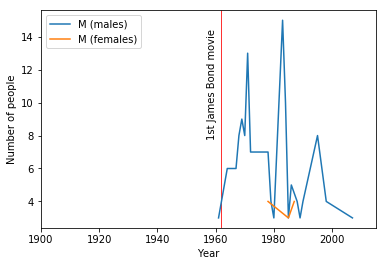

In [25]:
dfM_M = df[((df.name) == 'M') & (df.sex == 0)]
dfM_F = df[((df.name) == 'M') & (df.sex == 1)]
plt.plot(dfM_M.year, dfM_M.number, label = 'M (males)')
plt.plot(dfM_F.year, dfM_F.number, label = 'M (females)')
plt.xlim([1900,2015])
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.legend(loc = 'upper left')
plt.axvspan(1962, 1962, alpha=0.8, color='red')
plt.annotate('1st James Bond movie', xy=(1957, 14), rotation = 90)
plt.show()

## 2. See the evolution of some specific names throughout the years

### My first name: Kim!

In [26]:
dfKIM = df[(df.name) == 'KIM']
print('There have been ' + str(sum(dfKIM.number)) + ' people named Kim in France between 1900 and 2015.')

dfKIM_M = df[((df.name) == 'KIM') & ((df.sex) == False)]
print('including ' + str(sum(dfKIM_M.number)) + ' males')

dfKIM_F = df[((df.name) == 'KIM') & ((df.sex) == True)]
print('and ' + str(sum(dfKIM_F.number)) + ' females.')

There have been 5912 people named Kim in France between 1900 and 2015.
including 1153 males
and 4759 females.


There were almost no Kim at all in France before 1952 (males) and 1954 (females).


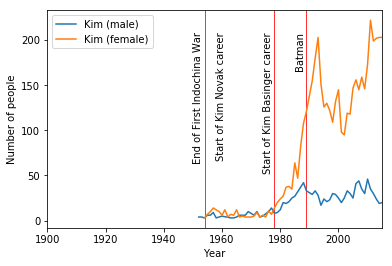

In [27]:
print('There were almost no Kim at all in France before 1952 (males) and 1954 (females).')

dfKIM_M = df[((df.name) == 'KIM') & ((df.sex) == False)]
dfKIM_F = df[((df.name) == 'KIM') & ((df.sex) == True)]

plt.plot(dfKIM_M.year, dfKIM_M.number, label = 'Kim (male)')
plt.plot(dfKIM_F.year, dfKIM_F.number, label = 'Kim (female)')
plt.xlim(1900,2015)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.axvspan(1954, 1954, alpha=0.8, color='red')
plt.annotate('End of First Indochina War', xy=(1950, 200), rotation = 90)
plt.annotate('Start of Kim Novak career', xy=(1958, 200), rotation = 90)
plt.axvspan(1978, 1978, alpha=0.8, color='red')
plt.annotate('Start of Kim Basinger career', xy=(1974, 200), rotation = 90)
plt.axvspan(1989, 1989, alpha=0.8, color='red')
plt.annotate("Batman", xy=(1985, 200), rotation = 90)
plt.show()

There were almost no Kim at all in France before 1952 (males) and 1954 (females).

The number of Kim increases around 1978, and reaches a local maximum in 1993.

There are probably correlations with:
- Immigration from Vietnam following the First Indochina War (1946-1954). Kim is a Sino-Vietnamese name (金) meaning gold (metal).
- The American actress, Kim Novak, began her career in 1954.
- The American actress, Kim Basinger, starting her acting career around 1978, and gained mainstream exposure in 1989 (Batman).

#### In 1986, the year I was born:

In [28]:
dfKIM_F86 = dfKIM_F[(dfKIM_F.year) == 1986]
print('There were ' + str(sum(dfKIM_F86.number)) + ' females named Kim in France in 1986')

dfKIM_M86 = dfKIM_M[(dfKIM_M.year) == 1986]
print('There were ' + str(sum(dfKIM_M86.number)) + ' males named Kim in France in 1986')

There were 47 females named Kim in France in 1986
There were 32 males named Kim in France in 1986


In [29]:
df1986 = df[(df.year) == 1986]

print(str(sum(df1986.number)) + ' people were born in 1986 in France.')

print('Only ' + str(round((sum(dfKIM_F86.number) + sum(dfKIM_M86.number)) / sum(df1986.number)*100, 2)) + 
      '% of them were named Kim!')

779050 people were born in 1986 in France.
Only 0.01% of them were named Kim!


### My husband's name: David

In [30]:
dfDAVID = df[(df.name) == 'DAVID']
print('There have been ' + str(sum(dfDAVID.number)) + 
      ' people named David in France between 1900 and 2015 (including a couple of females).')

dfDAVID_86 = df[((df.name) == 'DAVID') & ((df.year) == 1986)]
print('There were ' + str(sum(dfDAVID_86.number)) + ' people named David in France in 1986')

There have been 310359 people named David in France between 1900 and 2015 (including a couple of females).
There were 5426 people named David in France in 1986


In [31]:
df1986M = df[((df.year) == 1986) & ((df.sex) == False)]

print(str(sum(df1986M.number)) + ' males were born in 1986 in France.')

print(str(round(sum(dfDAVID_86.number) / sum(df1986M.number)*100, 2)) + '% of them were named David.')

399251 males were born in 1986 in France.
1.36% of them were named David.


In [32]:
# By comparison, the most common male name in 1986 was Julien with 15,332 people, 3.76% of all males born that year
df1986M = df1986M.sort_values(by = 'number', ascending = False)

print(df1986M.head(15))
print(15332/407362*100)

          sex       name  year  number
136562  False     JULIEN  1986   15332
189369  False    NICOLAS  1986   12504
96138   False  GUILLAUME  1986    9087
12919   False  ALEXANDRE  1986    8743
238197  False  SÉBASTIEN  1986    8157
243248  False     THOMAS  1986    8140
215542  False     ROMAIN  1986    8026
21918   False    ANTHONY  1986    7984
132493  False   JONATHAN  1986    7620
127805  False     JEREMY  1986    7082
169668  False    MATHIEU  1986    6929
53105   False     DAMIEN  1986    6313
251989  False    VINCENT  1986    5944
55070   False      DAVID  1986    5426
176959  False    MICKAEL  1986    4999
3.763728575566695


### Creating a function to get statistics and graphs on a given first name and birth year

In [33]:
def name_stats(name, year):
    name = name.upper()
    
    # General statistics on the name between 1900 and 2015
    print('Number of ' + str(name).title() + ' in France between 1900 and 2015:')
    dfNAME = df[(df.name) == name]
    print('Total: ' + str(sum(dfNAME.number)))
    dfNAME_M = df[((df.name) == name) & ((df.sex) == 0)]
    print('Male ' + str(sum(dfNAME_M.number)))
    dfNAME_F = df[((df.name) == name) & ((df.sex) == 1)]
    print('Female ' + str(sum(dfNAME_F.number)))
    
    # Statistics on the name in given year
    print('Number of ' + str(name).title() + ' in France in ' + str(year) + ':')
    dfNAME_yr = df[((df.name) == name) & ((df.year) == year)]
    print('Total: ' + str(sum(dfNAME_yr.number)))
    dfNAME_Myr = df[((df.name) == name) & ((df.sex) == 0) & ((df.year) == year)]
    print('Males: ' + str(sum(dfNAME_Myr.number)))
    dfNAME_Fyr = df[((df.name) == name) & ((df.sex) == 1) & ((df.year) == year)]
    print('Females: ' + str(sum(dfNAME_Fyr.number)))
        
    # Graph
    plt.plot(dfNAME_M.year, dfNAME_M.number, label = str(name) + ' (male)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.plot(dfNAME_F.year, dfNAME_F.number, label = str(name) + ' (female)')
    plt.xlim([1900,2015])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Number of people')
    plt.show()
    
    # Most common names in given year
    df_yrM = df[((df.year) == year) & ((df.sex) == 0)]
    df_yrF = df[((df.year) == year) & ((df.sex) == 1)]
    df_yrM = df_yrM.sort_values(by='number', ascending=False)
    df_yrF = df_yrF.sort_values(by='number', ascending=False)
    print('Top 5 male names in ' + str(year))
    print(df_yrM[['name', 'number']].head(5))
    print('Top 5 female names in ' + str(year))
    print(df_yrF[['name', 'number']].head(5))
    
    # Rank
    df_yrM['rank'] = df_yrM['number'].rank(ascending=0)
    male_rank = df_yrM.loc[df_yrM['name'] == name]['rank'].values
    if male_rank.size != 0:
        print('In ' + str(year) + ', '+ str(name) + ' was the ' + str(int(male_rank[0])) + 'th most popular male name.')
  
    df_yrF['rank'] = df_yrF['number'].rank(ascending=0)
    female_rank = df_yrF.loc[df_yrF['name'] == name]['rank'].values
    if female_rank.size != 0:
        print('In ' + str(year) + ', '+ str(name) + ' was the ' + str(int(female_rank[0])) + 'th most popular female name.')  

Number of Laura in France between 1900 and 2015:
Total: 145488
Male 0
Female 145488
Number of Laura in France in 1994:
Total: 7937
Males: 0
Females: 7937


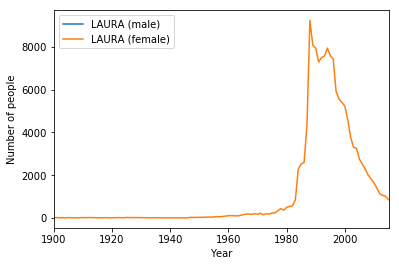

Top 5 male names in 1994
             name  number
142600      KEVIN    9906
189377    NICOLAS    9250
12927   ALEXANDRE    8829
243256     THOMAS    8149
172179     MAXIME    7634
Top 5 female names in 1994
           name  number
425888    LAURA    7937
458351    MANON    7486
462543    MARIE    7231
313867  CAMILLE    7020
475863   MARINE    6422
In 1994, LAURA was the 1th most popular female name.


In [34]:
# Testing the function
name_stats('Laura', 1994)

Number of Anna in France between 1900 and 2015:
Total: 104524
Male 0
Female 104524
Number of Anna in France in 2001:
Total: 1271
Males: 0
Females: 1271


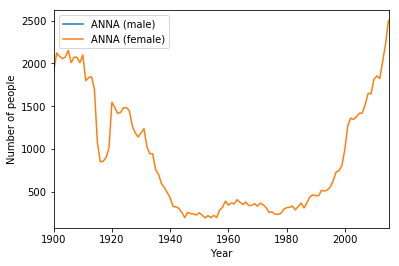

Top 5 male names in 2001
          name  number
243263  THOMAS   10104
156518   LUCAS    9038
243658    THÉO    8864
107508    HUGO    7050
172186  MAXIME    6596
Top 5 female names in 2001
           name  number
448536      LÉA   10725
458358    MANON    7593
323620    CHLOÉ    7040
313874  CAMILLE    6588
354174     EMMA    6394
In 2001, ANNA was the 59th most popular female name.


In [35]:
name_stats('Anna', 2001)

Number of Elisabeth in France between 1900 and 2015:
Total: 161158
Male 111
Female 161047
Number of Elisabeth in France in 1960:
Total: 4117
Males: 4
Females: 4113


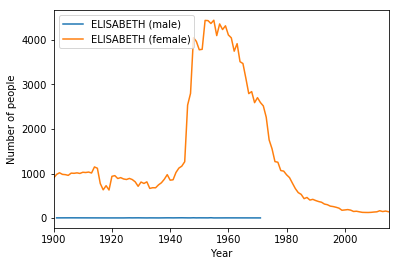

Top 5 male names in 1960
            name  number
201363  PHILIPPE   24761
198704   PATRICK   18522
119080      JEAN   17948
198210    PASCAL   17782
10564      ALAIN   15274
Top 5 female names in 1960
             name  number
317507  CATHERINE   18049
563797     SYLVIE   17656
324800  CHRISTINE   15152
462509      MARIE   15138
311555   BRIGITTE   14615
In 1960, ELISABETH was the 1201th most popular male name.
In 1960, ELISABETH was the 24th most popular female name.


In [36]:
name_stats('Elisabeth', 1960)

Number of Christian in France between 1900 and 2015:
Total: 405251
Male 405165
Female 86
Number of Christian in France in 1951:
Total: 16682
Males: 16678
Females: 4


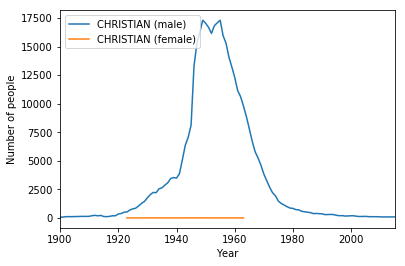

Top 5 male names in 1951
             name  number
119071       JEAN   35593
176647     MICHEL   25140
10555       ALAIN   23032
35580     BERNARD   16987
47097   CHRISTIAN   16678
Top 5 female names in 1951
             name  number
462500      MARIE   25312
478283    MARTINE   19008
371390  FRANÇOISE   13652
493626    MONIQUE   12798
507418     NICOLE   11537
In 1951, CHRISTIAN was the 5th most popular male name.
In 1951, CHRISTIAN was the 1238th most popular female name.


In [37]:
name_stats('Christian', 1951)

Number of David in France between 1900 and 2015:
Total: 310359
Male 310289
Female 70
Number of David in France in 1986:
Total: 5426
Males: 5426
Females: 0


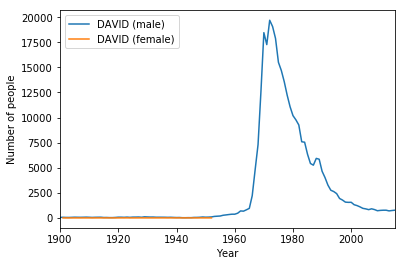

Top 5 male names in 1986
             name  number
136562     JULIEN   15332
189369    NICOLAS   12504
96138   GUILLAUME    9087
12919   ALEXANDRE    8743
238197  SÉBASTIEN    8157
Top 5 female names in 1986
             name  number
302540    AURÉLIE   11320
353631     EMILIE    9320
411595      JULIE    8970
350499     ELODIE    8527
560205  STÉPHANIE    8429
In 1986, DAVID was the 14th most popular male name.


In [38]:
name_stats('david', 1986)

Number of Bastien in France between 1900 and 2015:
Total: 52230
Male 52230
Female 0
Number of Bastien in France in 1981:
Total: 449
Males: 449
Females: 0


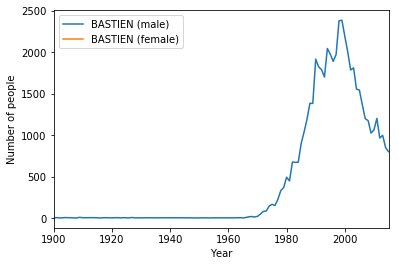

Top 5 male names in 1981
             name  number
189364    NICOLAS   20823
136557     JULIEN   15058
238192  SÉBASTIEN   14657
55065       DAVID    9776
96133   GUILLAUME    8839
Top 5 female names in 1981
             name  number
333618     CÉLINE   12506
302535    AURÉLIE   12364
353626     EMILIE   10821
577440   VIRGINIE    8893
560200  STÉPHANIE    8523
In 1981, BASTIEN was the 138th most popular male name.


In [39]:
name_stats('Bastien', 1981)

## 3. Evolution of the number of names

### Number of births per year
We can easily notice on the graph:
- the dip in the number of births during WWI, from 548,000 in 1913 down to 283,000 in 1916 (-48% in 3 years)!
- the dip in the number of births during WWII
- the baby boom after WWII, from 592,000 in 1945 up to 893,000 in 1947 (+51% in 2 years)!

Number of births in 1913: 544386
Number of births in 1916: 280530
Number of births in 1945: 587709
Number of births in 1947: 889095


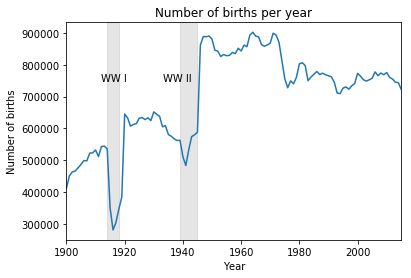

In [40]:
annual_births = df.groupby(['year'])['number'].sum()

for year in sorted({1913, 1916, 1945, 1947}):
    print('Number of births in ' + str(year) + ': ' + str(annual_births[year]))

annual_births.plot(kind='line', title = 'Number of births per year')
plt.xlim([1900,2015])
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.axvspan(1914, 1918, alpha=0.2, color='grey')
plt.annotate('WW I', xy=(1912, 750000))
plt.axvspan(1939, 1945, alpha=0.2, color='grey')
plt.annotate('WW II', xy=(1933, 750000))
plt.show()

### Number of different names per year

The number of unique names per year has increased from less than 1,600 in 1900, to 6000+ in 1986 and 12,000+ in 2015.

Number of unique names in 1900: 1593
Number of unique names in 1986: 6390
Number of unique names in 2015: 12354


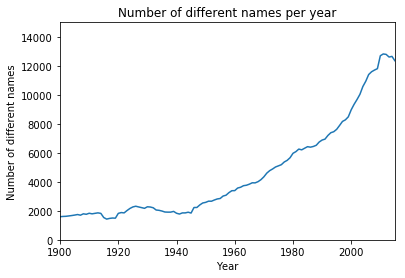

In [41]:
annual_names = df.groupby(['year'])['name'].nunique()

for year in sorted({1900, 1986, 2015}):
    print('Number of unique names in ' + str(year) + ': ' + str(annual_names[year]))

annual_names.plot(kind='line', title = 'Number of different names per year')
plt.xlim([1900,2015])
plt.ylim([0,15000])
plt.xlabel('Year')
plt.ylabel('Number of different names')
plt.show()

### Ratio of different names per number of births

There is a sharp increase in the number of unique names compared to the increase in the number of births, starting around 1950.

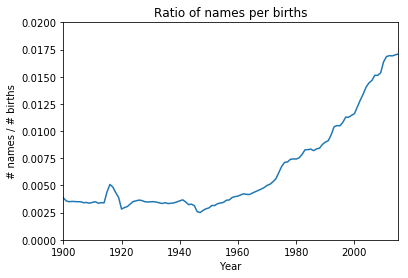

In [42]:
ratio = annual_names / annual_births

ratio.plot(kind='line', title = 'Ratio of names per births')
plt.xlim([1900,2015])
plt.ylim([0,0.02])
plt.xlabel('Year')
plt.ylabel('# names / # births')
plt.show()

### Rare names

We can also notice how the number of people with rare names increased from 2,980 in 1900 (0.01% of births) to 56,107 in 2015 (0.07% of births).

Rare names are names with less than 20 people between 1900 and 1945 (condition 1), and less than 20 people between 1946 and 2015 (condition 2).

Rare names in 1900: 2980 people (0.01% of births)
Rare names in 2015: 56107 people (0.07% of births)


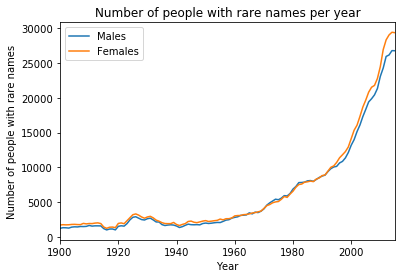

In [43]:
df_rare_M = df_rare[((df_rare.sex) == 0)]
df_rare_F = df_rare[((df_rare.sex) == 1)]

for year in sorted({1900, 2015}):
    nb = sum(df_rare[((df_rare.year) == year)].number)
    ratio = nb / (sum(df[((df.year) == year)].number) + sum(df_rare[((df_rare.year) == year)].number))
    print('Rare names in ' + str(year) + ': ' + 
          str(nb) + ' people ' +
          '(' + str(round(ratio, 2)) + '% of births' + ')')

plt.plot(df_rare_M.year, df_rare_M.number, label = 'Males')
plt.plot(df_rare_F.year, df_rare_F.number, label = 'Females')
plt.xlim([1900,2015])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of people with rare names')
plt.title('Number of people with rare names per year')
plt.show()

## 4. Evolution of the length of names

Inspired by INSEE analysis: 

'L'évolution des prénoms en région Centre : plus courts et plus variés que par le passé'

('The evolution of first names in the Centre region of France: shorter and more diverse than in the past'

https://www.insee.fr/fr/statistiques/1292923

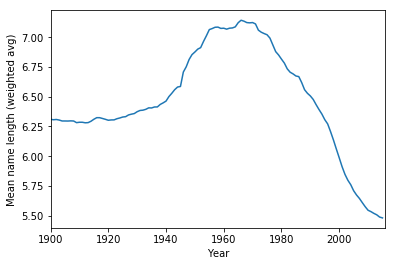

In [44]:
# Calculate length of names per year weighted by the number of births
names_length = {}
for i in range(len(df.index)):
    if df.iloc[i]['year'] in names_length:
        names_length[df.iloc[i]['year']] += len(str(df.iloc[i]['name'])) * df.iloc[i]['number']
    else:
        names_length[df.iloc[i]['year']] = len(str(df.iloc[i]['name'])) * df.iloc[i]['number']

# Create a dataframe from the dictionnary
length = pd.DataFrame.from_dict(names_length, orient='index')
length['year'] = length.index
length = length.rename(columns = {0:'length'})

# Sort rows by increasing years
length = length.sort_values(by='year')

# Reorder columns
length = length[['year', 'length']] 

# Add a column with number of births per year
length['births'] = df.groupby(['year'])['number'].sum()

# Add a column with mean length of names per year (mean weighted by number of births)
length['avg_length'] = length['length'] / length['births']

# Create graph
plt.plot(length.year, length.avg_length)
plt.xlabel('Year')
plt.ylabel('Mean name length (weighted avg)')
plt.xlim([1900,2016])
plt.show()

### TO DO

Alternate method? Add 2 columns (length and length*number ) and then groupby year

In [45]:
# Can see if it somewhat correlates with the top names in 1900, 1970 and 2010
def top_names(year):
    dfyrM = df[((df.year) == year) & ((df.sex) == 0)]
    dfyrM = dfyrM.sort_values(by = 'number', ascending = False)
    print(dfyrM.head(3))
    
    dfyrF = df[((df.year) == year) & ((df.sex) == 1)]
    dfyrF = dfyrF.sort_values(by = 'number', ascending = False)
    print(dfyrF.head(3))

top_names(1900)
top_names(1970)
top_names(2010)

          sex    name  year  number
119020  False    JEAN  1900   14108
154339  False   LOUIS  1900    9057
201834  False  PIERRE  1900    7460
         sex        name  year  number
462449  True       MARIE  1900   48727
403785  True      JEANNE  1900   13983
460374  True  MARGUERITE  1900    8059
          sex        name  year  number
47397   False  CHRISTOPHE  1970   21856
235971  False    STÉPHANE  1970   21796
148072  False     LAURENT  1970   19957
         sex      name  year  number
503215  True  NATHALIE  1970   26217
574404  True   VALÉRIE  1970   19390
542332  True  SANDRINE  1970   18056
          sex    name  year  number
186808  False  NATHAN  2010    7034
156527  False   LUCAS  2010    6922
71556   False    ENZO  2010    5950
         sex   name  year  number
354183  True   EMMA  2010    6401
458367  True  MANON  2010    5044
439013  True   LOLA  2010    4907
